# Root Cause Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
restaurant_data = pd.read_csv("restaurant_df.csv")
restaurant_data.head(5)

,name,location,avg_rating,total_votes,avg_cost,num_dishes
0,1 Fahreheit,New BEL Road,3.919672,0,200.0,1
1,1000 BC,Koramangala 5th Block,3.200000,294,300.0,6
2,100C,BTM,3.700000,123,450.0,3
3,11 to 11 Express Biriyanis,Electronic City,3.500000,44,300.0,2
4,1131 Bar Kitchen,Indiranagar,4.500000,16938,1500.0,6


In [ ]:
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12114 entries, 0 to 12113
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         12114 non-null  object 
 1   location     12114 non-null  object 
 2   avg_rating   12114 non-null  float64
 3   total_votes  12114 non-null  int64  
 4   avg_cost     12114 non-null  float64
 5   num_dishes   12114 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 568.0+ KB


In [ ]:
restaurant_data.columns

Index(['name', 'location', 'avg_rating', 'total_votes', 'avg_cost',
       'num_dishes'],
      dtype='object')

In [ ]:
restaurant_data.describe()

,avg_rating,total_votes,avg_cost,num_dishes
count,12114.000000,12114.000000,12114.000000,12114.000000
mean,3.619756,1211.159402,488.093895,4.269193
std,0.379974,5797.807775,392.113154,3.425170
min,1.800000,0.000000,40.000000,1.000000
25%,3.400000,5.000000,250.000000,2.000000
50%,3.600000,76.000000,400.000000,3.000000
75%,3.851724,460.000000,600.000000,5.000000
max,4.900000,220509.000000,6000.000000,34.000000


In [ ]:
cuisine_data = pd.read_csv("cuisine_dim.csv")
cuisine_data.head(5)

,Unnamed: 0,clean_name,location,cuisine_list
0,0,Jalsa,Banashankari,North Indian
1,1,Jalsa,Banashankari,Mughlai
2,2,Jalsa,Banashankari,Chinese
3,3,Spice Elephant,Banashankari,Chinese
4,4,Spice Elephant,Banashankari,North Indian


In [ ]:
cuisine_data = cuisine_data.drop(columns="Unnamed: 0")

In [ ]:
cuisine_data.head(5)

,clean_name,location,cuisine_list
0,Jalsa,Banashankari,North Indian
1,Jalsa,Banashankari,Mughlai
2,Jalsa,Banashankari,Chinese
3,Spice Elephant,Banashankari,Chinese
4,Spice Elephant,Banashankari,North Indian


In [ ]:
cuisine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28615 entries, 0 to 28614
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   clean_name    28615 non-null  object
 1   location      28615 non-null  object
 2   cuisine_list  28615 non-null  object
dtypes: object(3)
memory usage: 670.8+ KB


In [ ]:
cuisine_data.describe()

,clean_name,location,cuisine_list
count,28615,28615,28615
unique,8736,94,108
top,FreshMenu,Whitefield,North Indian
freq,106,1900,4968


In [ ]:
restaurant_data.head()

,name,location,avg_rating,total_votes,avg_cost,num_dishes
0,1 Fahreheit,New BEL Road,3.919672,0,200.0,1
1,1000 BC,Koramangala 5th Block,3.200000,294,300.0,6
2,100C,BTM,3.700000,123,450.0,3
3,11 to 11 Express Biriyanis,Electronic City,3.500000,44,300.0,2
4,1131 Bar Kitchen,Indiranagar,4.500000,16938,1500.0,6


In [ ]:
location_summary = (
    restaurant_data
    .groupby("location")
    .agg(
        avg_rating=('avg_rating', 'mean'),
        total_votes=('total_votes', 'sum'),
        avg_cost=('avg_cost','mean'),
        restaurant_count=('name', 'count')
    )
    .reset_index()
)


In [ ]:
location_summary.head()


,location,avg_rating,total_votes,avg_cost,restaurant_count
0,BTM,3.572373,619376,379.672783,698
1,Banashankari,3.618217,162374,375.636042,283
2,Banaswadi,3.513722,35657,379.720854,203
3,Bannerghatta Road,3.515029,219077,423.494230,448
4,Basavanagudi,3.663918,94919,342.445122,205


In [ ]:
location_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   location          94 non-null     object 
 1   avg_rating        94 non-null     float64
 2   total_votes       94 non-null     int64  
 3   avg_cost          94 non-null     float64
 4   restaurant_count  94 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 3.8+ KB


In [ ]:
median_cost = location_summary['avg_cost'].median()
median_rating = location_summary['avg_rating'].median()

median_cost, median_rating

(np.float64(427.4628805022264), np.float64(3.6117204339359796))

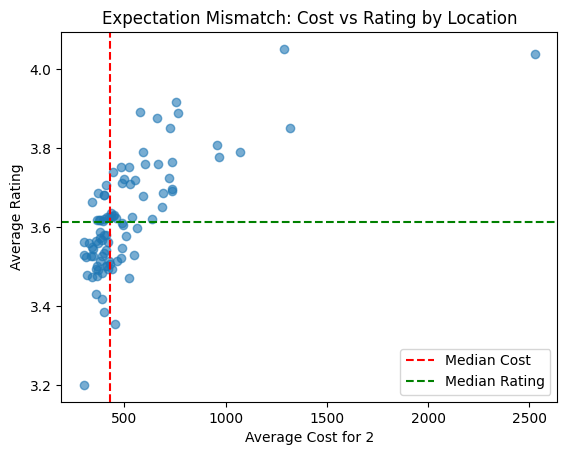

In [ ]:
plt.scatter(
    location_summary['avg_cost'],
    location_summary['avg_rating'],
    alpha = 0.6
)

plt.axvline(median_cost, color='red', linestyle='--', label="Median Cost" )
plt.axhline(median_rating, color='green', linestyle='--', label="Median Rating")

plt.xlabel("Average Cost for 2")
plt.ylabel("Average Rating")
plt.title("Expectation Mismatch: Cost vs Rating by Location")
plt.legend()

plt.show()

### Expectation Mismatch – Key Insights (Cost vs Rating)

- Higher prices do not always mean better ratings across locations.

- Most locations with good ratings are in the low to mid price range.

- This shows that customers care more about food quality, service, and consistency than just premium pricing.

- A few expensive locations have only average ratings, which means customers feel the price is not worth the experience.

- Only a small number of premium locations manage to justify their higher prices with better ratings.

#### Key Takeaway:
- #### "Customers are happiest when they feel they are getting good value for the money, not just when prices are high."

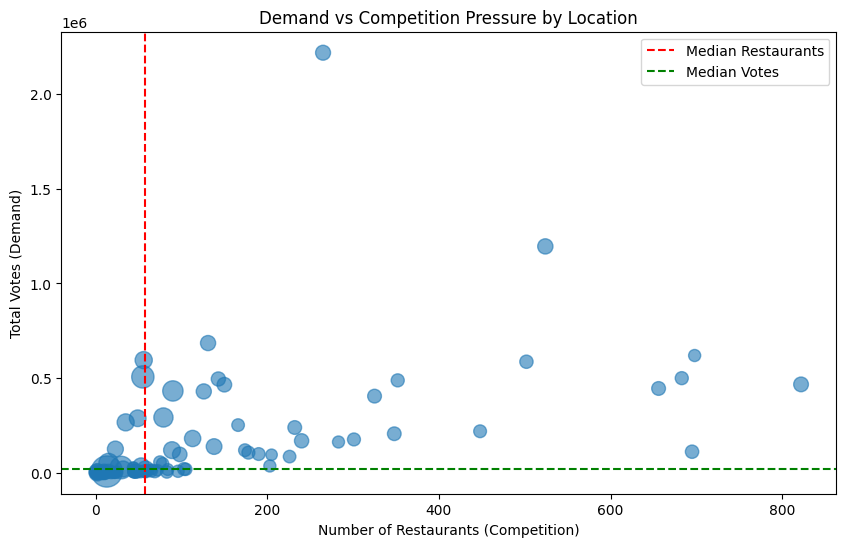

In [ ]:
median_restaurants = location_summary['restaurant_count'].median()
median_votes = location_summary['total_votes'].median()

plt.figure(figsize=(10, 6))

plt.scatter(
    location_summary['restaurant_count'],
    location_summary['total_votes'],
    s=location_summary['avg_cost'] / 5,
    alpha=0.6
)

plt.axvline(median_restaurants, color='red', linestyle='--', label='Median Restaurants')
plt.axhline(median_votes, color='green', linestyle='--', label='Median Votes')

plt.xlabel("Number of Restaurants (Competition)")
plt.ylabel("Total Votes (Demand)")
plt.title("Demand vs Competition Pressure by Location")
plt.legend()

plt.show()


The analysis shows that locations with strong demand but limited competition offer the best opportunities for restaurant success. Highly crowded locations dilute customer attention, making it difficult for individual restaurants to maintain high performance.

# Final Business Recommendations 
1. Pricing should match experience
    - Charging more does not always lead to better customer ratings.

    - Customers expect better food and service when prices are high.

    - If the experience does not match the price, ratings drop.

**What to do**:
    - Restaurants should review their prices and make sure the quality and service justify them.

2. Choose locations wisely

    - Locations with fewer restaurants but good demand perform better.

    - Crowded areas make it harder for restaurants to stand out.

**What to do**:
    - Open restaurants in areas with demand but less competition instead of already crowded locations.

3. Handle competition carefully

    - Too many restaurants in one area increases pressure.

    - Small mistakes affect ratings more in crowded locations.

**What to do**:
    - Focus on consistent food quality, fast delivery, and good service rather than competing only on price.

4. Keep menus simple

    - Very large menus are hard to manage and affect consistency.

    - Customers prefer a few well-made dishes over many average ones.

**What to do**:
    - Reduce menu size and focus on best-selling items.

5. How Zomato can help restaurants

    - Zomato has enough data to guide restaurants better.

    - Promoting good-value restaurants can improve customer satisfaction.

**What to do**:
    - Use data to suggest better pricing, locations, and visibility for restaurants.

## Final Conclusion 

    - Customers care more about value for money than high prices.

    - High demand alone does not guarantee success if competition is too high.

    - Restaurants perform best when pricing, quality, and location are balanced.

    - Data helps identify problems early and improve business decisions.

#### Key Takeaway

-    Restaurants succeed when they offer good value in the right location, not just by charging higher prices.